In [1]:
import numpy as np

def my_lin_interp(x, y, X):
    Y = np.zeros_like(X)
    n = len(x)
    
    for i in range(len(X)):
        j = 0
        while j < n - 1 and X[i] > x[j + 1]:
            j += 1

        if j < n - 1:
            Y[i] = y[j] + (y[j + 1] - y[j]) * (X[i] - x[j]) / (x[j + 1] - x[j])
        else:
            Y[i] = y[n - 1] 
    
    return Y

Linear Interpolation Results:
X = 0.5, Y_interp = 0.5
X = 1.5, Y_interp = 2.5
X = 2.5, Y_interp = 6.5
X = 3.5, Y_interp = 12.5


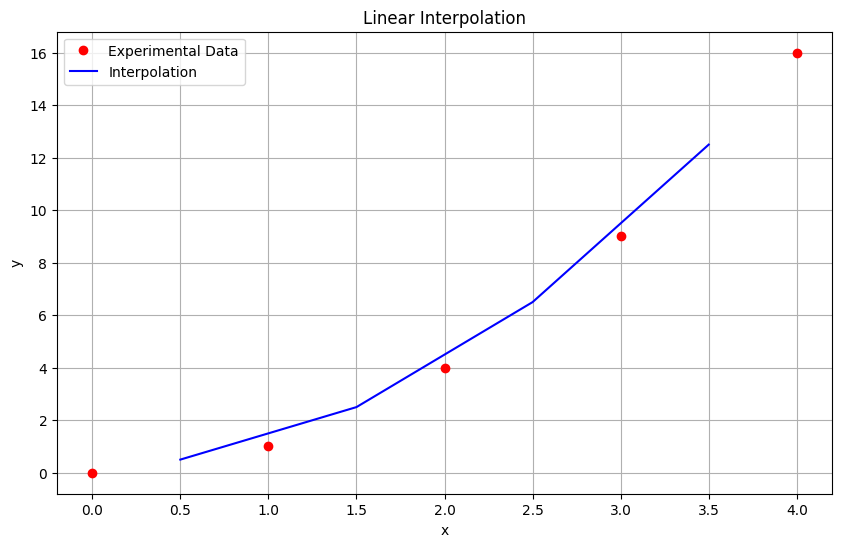

In [3]:
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 4, 9, 16])
X = np.array([0.5, 1.5, 2.5, 3.5])

Y_interp = my_lin_interp(x, y, X)
print("Linear Interpolation Results:")
for i in range(len(X)):
    print(f"X = {X[i]}, Y_interp = {Y_interp[i]}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Experimental Data')
plt.plot(X, Y_interp, 'b-', label='Interpolation')
plt.title('Linear Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

def my_cubic_spline(x, y, X):
    n = len(x)
    h = np.diff(x)
    b = np.diff(y) / h
    u = np.zeros_like(x)
    v = np.zeros_like(x)
    u[1:n-1] = 2 * (h[0:n-2] + h[1:n-1])
    v[1:n-1] = 6 * (b[1:n-1] - b[0:n-2])
    
    z = np.zeros_like(x)
    A = np.zeros((3, n))
    A[0, 1:n-1] = h[0:n-2]
    A[1, 1:n-1] = 2 * (h[0:n-2] + h[1:n-1])
    A[2, 0:n-2] = h[1:n-1]
    
    A = A[:, 1:n-1] 
    v = v[1:n-1]  
    
    z[1:n-1] = solve_banded((1, 1), A, v)
    
    Y = np.zeros_like(X)
    for i in range(len(X)):
        j = np.searchsorted(x, X[i]) - 1
        if j >= 0 and j < n - 1:
            hi = x[j+1] - x[j]
            Y[i] = ((x[j+1] - X[i])**3 * z[j] + (X[i] - x[j])**3 * z[j+1]) / (6 * hi) + \
                   ((x[j+1] - X[i]) * y[j] + (X[i] - x[j]) * y[j+1]) / hi
    
    return Y

Cubic Spline Interpolation Results:
X = 0.5, Y_interp = 0.5416666666666666
X = 1.5, Y_interp = 2.5625
X = 2.5, Y_interp = 6.5625
X = 3.5, Y_interp = 12.541666666666666


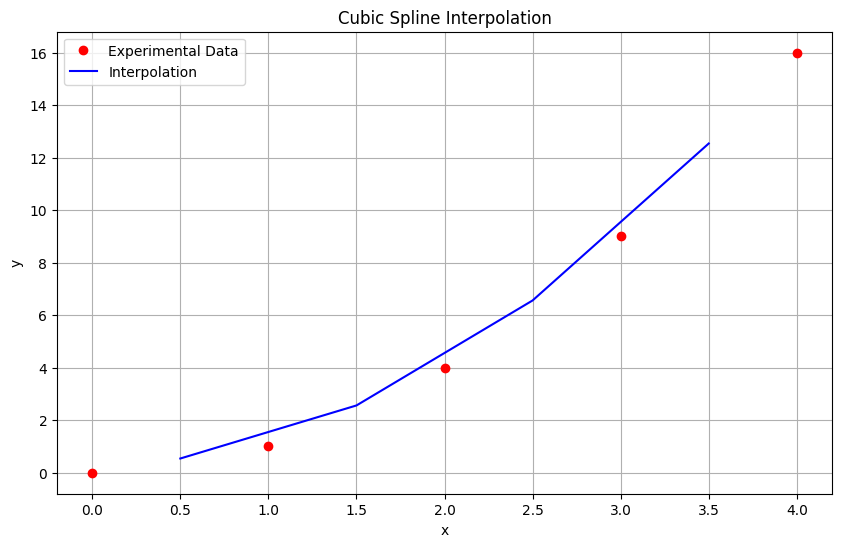

In [12]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 4, 9, 16])
X = np.array([0.5, 1.5, 2.5, 3.5])

Y_interp = my_cubic_spline(x, y, X)
print("Cubic Spline Interpolation Results:")
for i in range(len(X)):
    print(f"X = {X[i]}, Y_interp = {Y_interp[i]}")
    
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Experimental Data')
plt.plot(X, Y_interp, 'b-', label='Interpolation')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

def my_cubic_spline_flat(x, y, X):
    n = len(x)
    h = np.diff(x)
    b = np.diff(y) / h
    u = np.zeros(n)
    v = np.zeros(n)
    u[1:n-1] = 2 * (h[:-1] + h[1:])
    v[1:n-1] = 6 * (b[1:] - b[:-1])
    
    u[0] = 1
    u[-1] = 1
    v[0] = 0
    v[-1] = 0
    
    z = np.zeros(n)
    A = np.zeros((3, n))
    A[0, 2:] = h[1:]  
    A[1, :] = u  
    A[2, :-2] = h[:-1] 
    v = v[1:-1]  
    z[1:-1] = solve_banded((1, 1), A[:, 1:-1], v)
    
    Y = np.zeros_like(X)
    for i in range(len(X)):
        j = np.searchsorted(x, X[i]) - 1
        if j >= 0 and j < n - 1:
            hi = x[j+1] - x[j]
            Y[i] = ((x[j+1] - X[i])**3 * z[j] + (X[i] - x[j])**3 * z[j+1]) / (6 * hi) + \
                   ((x[j+1] - X[i]) * y[j] + (X[i] - x[j]) * y[j+1]) / hi
    
    return Y

Cubic Spline Interpolation with Flat Ends Results:
X = 0.5, Y_interp = 0.5535714285714286
X = 1.5, Y_interp = 2.5892857142857144
X = 2.5, Y_interp = 6.589285714285714
X = 3.5, Y_interp = 12.553571428571429


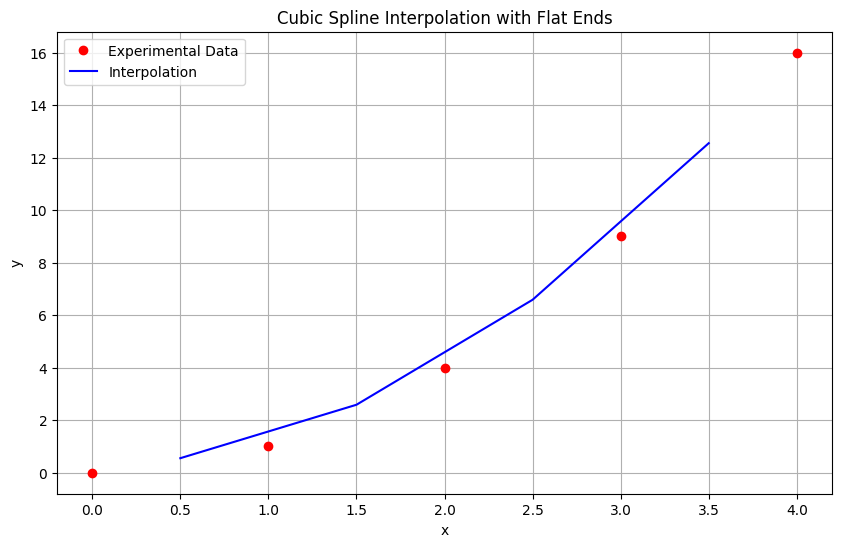

In [20]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 4, 9, 16])
X = np.array([0.5, 1.5, 2.5, 3.5])

Y_interp = my_cubic_spline_flat(x, y, X)
print("Cubic Spline Interpolation with Flat Ends Results:")
for i in range(len(X)):
    print(f"X = {X[i]}, Y_interp = {Y_interp[i]}")


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Experimental Data')
plt.plot(X, Y_interp, 'b-', label='Interpolation')
plt.title('Cubic Spline Interpolation with Flat Ends')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

def my_quintic_spline(x, y, X):
    n = len(x)
    
    A = np.zeros((6 * (n - 1), 6 * (n - 1)))
    B = np.zeros(6 * (n - 1))
    
    eq_idx = 0
    
    for i in range(n - 1):
        A[eq_idx, 6*i:6*(i+1)] = [1, x[i], x[i]**2, x[i]**3, x[i]**4, x[i]**5]
        B[eq_idx] = y[i]
        eq_idx += 1

        A[eq_idx, 6*i:6*(i+1)] = [1, x[i+1], x[i+1]**2, x[i+1]**3, x[i+1]**4, x[i+1]**5]
        B[eq_idx] = y[i+1]
        eq_idx += 1

        if i < n - 2:
            for d in range(1, 5):
                A[eq_idx, 6*i + d] = d * x[i+1]**(d-1)
                A[eq_idx, 6*(i+1) + d] = -d * x[i+1]**(d-1)
                eq_idx += 1

    A[eq_idx, :6] = [0, 0, 2, 6 * x[0], 12 * x[0]**2, 20 * x[0]**3] 
    eq_idx += 1
    A[eq_idx, :6] = [0, 0, 0, 6, 24 * x[0], 60 * x[0]**2]  
    eq_idx += 1
    A[eq_idx, -6:] = [0, 0, 2, 6 * x[-1], 12 * x[-1]**2, 20 * x[-1]**3]  
    eq_idx += 1
    A[eq_idx, -6:] = [0, 0, 0, 6, 24 * x[-1], 60 * x[-1]**2]  
    eq_idx += 1

    print("Matrix A:")
    print(A)
    print("Matrix B:")
    print(B)

    coeffs = solve(A, B)
    
    Y = np.zeros_like(X)
    for i in range(len(X)):
        j = np.searchsorted(x, X[i]) - 1
        if j >= 0 and j < n - 1:
            c = coeffs[6*j:6*(j+1)]
            Y[i] = np.polyval(c[::-1], X[i])
    
    return Y

Matrix A:
[[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00 -1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  2.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00 -2.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00 

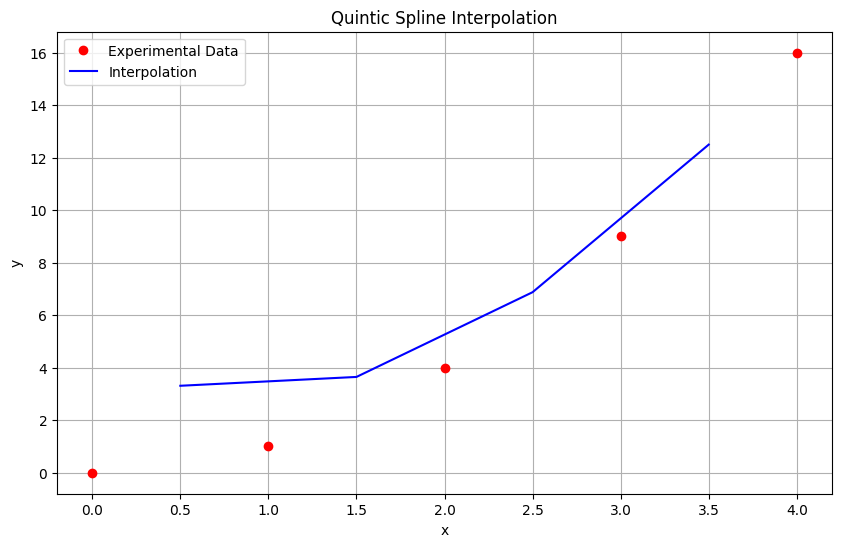

In [40]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 4, 9, 16])
X = np.array([0.5, 1.5, 2.5, 3.5])

Y_interp = my_quintic_spline(x, y, X)
print("Quintic Spline Interpolation Results:")
for i in range(len(X)):
    print(f"X = {X[i]}, Y_interp = {Y_interp[i]}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Experimental Data')
plt.plot(X, Y_interp, 'b-', label='Interpolation')
plt.title('Quintic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def my_interp_plotter(x, y, X, option):
    if option == 'linear':
        interp_func = interp1d(x, y, kind='linear', fill_value='extrapolate')
    elif option == 'spline':
        interp_func = interp1d(x, y, kind='cubic', fill_value='extrapolate')
    elif option == 'nearest':
        interp_func = interp1d(x, y, kind='nearest', fill_value='extrapolate')
    else:
        raise ValueError("Invalid interpolation option. Choose 'linear', 'spline', or 'nearest'.")

    Y = interp_func(X)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(x, y, 'ro', label='Experimental Data')
    
    plt.plot(X, Y, 'b-', label=f'Interpolation ({option.capitalize()})')
    
    plt.title(f'Interpolation using {option.capitalize()} Method')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

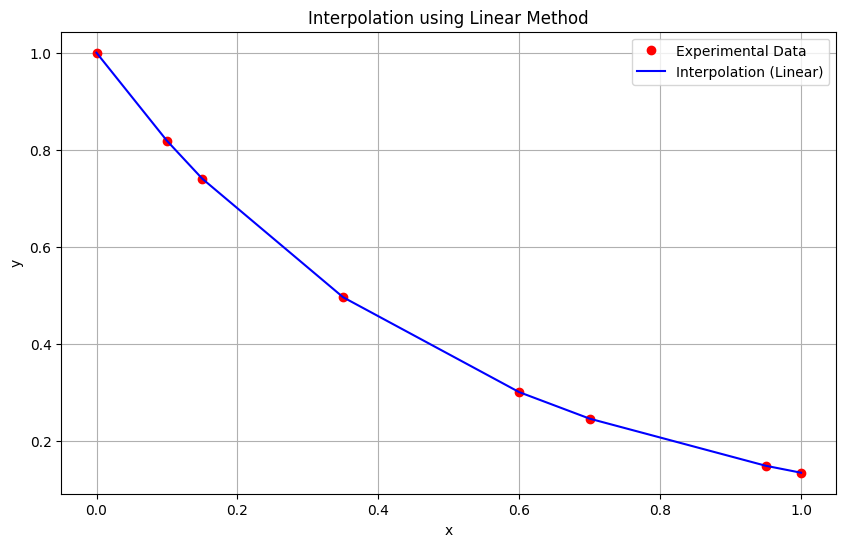

In [46]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])
X = np.linspace(0, 1, 101)
my_interp_plotter(x, y, np.linspace(0, 1, 101), 'linear')